In [1]:
%matplotlib inline

import pandas as pd

r = pd.read_csv( 'Books Data/ratings.csv' )
tr = pd.read_csv( 'Books Data/to_read.csv' )
b = pd.read_csv( 'Books Data/books.csv' )

t = pd.read_csv( 'Books Data/tags.csv' )
bt = pd.read_csv( 'Books Data/book_tags.csv')

In [4]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [5]:
len(r)

5976479

<AxesSubplot:>

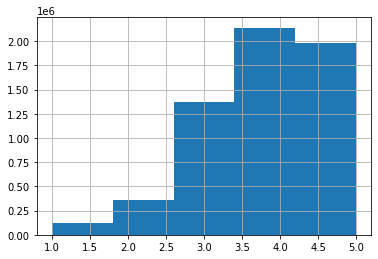

In [6]:
r.rating.hist(bins = 5)

In [7]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [8]:
len(tr)

912705

In [9]:
len(tr.book_id.unique())

9986

In [10]:
len(tr.user_id.unique())

48871

In [11]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [12]:
len(b)

10000

In [13]:
r.user_id.max()

53424

In [14]:
r.book_id.max()

10000

In [15]:
reviews_per_book = r.groupby('book_id').book_id.apply(lambda x: len(x))
reviews_per_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

In [16]:
reviews_per_book.sort_values().head(10)

book_id
7803     8
9345    11
9486    24
1935    33
9315    36
9553    41
8181    45
9479    48
9260    48
9705    50
Name: book_id, dtype: int64

In [17]:
reviews_per_user = r.groupby('user_id').user_id.apply(lambda x: len(x))
reviews_per_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [18]:
reviews_per_user.sort_values().head(10)

user_id
34590    19
43675    20
40753    21
51725    21
32128    21
37640    22
16470    22
42736    22
48077    22
40299    22
Name: user_id, dtype: int64

In [19]:
t.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [20]:
len(t)

34252

In [21]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [22]:
len(bt)

999912

In [23]:
bt = bt.merge(t, on='tag_id')

In [25]:
bt = bt.merge(b[['goodreads_book_id', 'title']], on = 'goodreads_book_id')

In [26]:
bt['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [27]:
bt.loc[bt['count']<0, 'count'] = 0

In [28]:
bt.sample(10, weights = 'count')

,goodreads_book_id,tag_id,count,tag_name,title
911494,18166936,30574,57424,to-read,The Strange and Beautiful Sorrows of Ava Lavender
17800,2199,30574,141668,to-read,Team of Rivals: The Political Genius of Abraha...
453705,249747,11743,1586,fiction,"Artemis Fowl (Artemis Fowl, #1)"
294700,69242,30574,25103,to-read,Made to Stick: Why Some Ideas Survive and Othe...
140600,17728,30574,11508,to-read,The House of Mirth
536994,628139,30574,15761,to-read,"Sea Swept (Chesapeake Bay Saga, #1)"
883448,17235026,3358,180,audible,The Girl with All the Gifts
232489,41681,26257,44,rory-gilmore-reading-list,The Jungle
780594,10954979,30574,14386,to-read,The Swerve: How the World Became Modern
481094,330760,30574,6515,to-read,The Subterraneans


In [29]:
tag_counts = bt.groupby('tag_name').tag_name.count().sort_values(ascending=False)
tag_counts.head(20)

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
Name: tag_name, dtype: int64

In [33]:
bt.goodreads_book_id.max()

33288638

In [34]:
b.goodreads_book_id.max()

33288638

In [2]:
len(r)

5976479

In [4]:
test = 0
for x in range(0, 1000000):
    test = test + 1
test

1000000